# Modello Conconi V2 
### author: L. S.
### agosto 2017

In [1]:
import numpy
import pandas as pd
import sklearn.linear_model as lm
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# nome del file che contiene i dati in input
NOMEFILE = "conconiman.csv"

# nome del file che contiene il grafico prodotto
# per ora non usato
# NOMEPDF = "graf.pdf"

# nomi delle colonne contenenti speed (x), heart rate (y)
COLONNAX = "speed"
COLONNAY = "media-hr"

In [3]:
dati = pd.read_csv(NOMEFILE)

print("Dati in input:")
print()
print(dati)

# servono solo le colonne speed e media-hr

Dati in input:

   avg-pace    sec  speed  media-hr  max-hr
0     06:59  419.0   8.59       139     145
1     06:54  414.0   8.70       146     152
2     06:24  384.0   9.38       153     155
3     06:16  376.0   9.57       157     162
4     05:48  348.0  10.34       160     162
5     05:32  332.0  10.84       165     170
6     05:18  318.0  11.32       171     173
7     05:03  303.0  11.88       175     177
8     04:51  291.0  12.37       179     180
9     04:42  282.0  12.77       181     183
10    04:21  261.0  13.79       184     187
11    04:32    NaN  13.24       186     188
12    04:07  247.0  14.57       189     191


In [4]:
## prepara il modello

In [5]:
olm = lm.LinearRegression()

In [6]:
X = numpy.array(dati[COLONNAX])[:, numpy.newaxis]
y = dati[COLONNAY]

## Training del modello (Ordinary Least Squares)

In [7]:
olm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
olm_score = olm.score(X, y)

print()
print("Score del modello: %.3f" % olm_score)


Score del modello: 0.957


## predizione lineare

In [9]:
yp = olm.predict(X)

## disegna grafico dati input

In [10]:
# matplotlib.style.use("ggplot")

In [11]:
plt.plot(X, y)
plt.plot(X, yp)

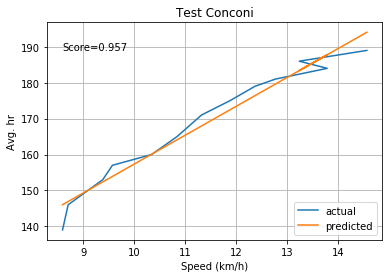

In [12]:
plt.title("Test Conconi")
plt.xlabel("Speed (km/h)")
plt.ylabel("Avg. hr")
plt.legend(["actual", "predicted"], loc="lower right")
plt.annotate("Score=%.3f" % olm_score, xy=(X.min(), y.max()))
plt.grid()
plt.show()

### La SAN (soglia anaerobica) è il punto di deflessione, dove la relazione y = f(x) cessa di essere lineare
### nel caso di esempio, circa 13.5 (+/- 0.5)